In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps = pd.read_csv("apps.csv")
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
apps.shape

(9659, 14)

In [4]:
apps.info

<bound method DataFrame.info of       Unnamed: 0                                                App  \
0              0     Photo Editor & Candy Camera & Grid & ScrapBook   
1              1                                Coloring book moana   
2              2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3              3                              Sketch - Draw & Paint   
4              4              Pixel Draw - Number Art Coloring Book   
...          ...                                                ...   
9654       10836                                   Sya9a Maroc - FR   
9655       10837                   Fr. Mike Schmitz Audio Teachings   
9656       10838                             Parkinson Exercices FR   
9657       10839                      The SCP Foundation DB fr nn5n   
9658       10840      iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews  Size     Installs  Type Price  \
0          ART_AND_DESIGN     4.1     

In [5]:
apps.describe

<bound method NDFrame.describe of       Unnamed: 0                                                App  \
0              0     Photo Editor & Candy Camera & Grid & ScrapBook   
1              1                                Coloring book moana   
2              2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3              3                              Sketch - Draw & Paint   
4              4              Pixel Draw - Number Art Coloring Book   
...          ...                                                ...   
9654       10836                                   Sya9a Maroc - FR   
9655       10837                   Fr. Mike Schmitz Audio Teachings   
9656       10838                             Parkinson Exercices FR   
9657       10839                      The SCP Foundation DB fr nn5n   
9658       10840      iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews  Size     Installs  Type Price  \
0          ART_AND_DESIGN     4.1   

### Data Cleaning
 Handle Missing Values

In [6]:
apps.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [7]:
apps['Rating'].fillna(apps['Rating'].median(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13392\2536862848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Rating'].fillna(apps['Rating'].median(), inplace=True)


Clean Size Column (FIXED VERSION)

In [8]:
apps['Size'] = apps['Size'].astype(str)
apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = apps['Size'].str.replace('M', '')
apps['Size'] = apps['Size'].str.replace('k', '')
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')

Clean Installs Column

In [9]:
apps['Installs'] = apps['Installs'].str.replace('+', '', regex=False)
apps['Installs'] = apps['Installs'].str.replace(',', '')
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

Clean Price Column

In [10]:
apps['Price'] = apps['Price'].str.replace('$', '', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

Apps per Category

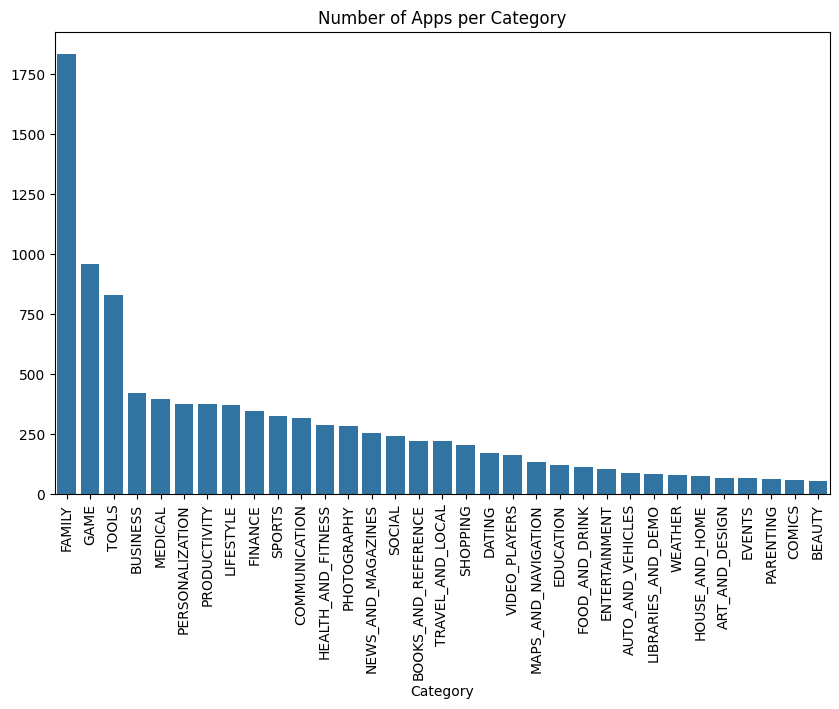

In [11]:
category_count = apps['Category'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=category_count.index, y=category_count.values)
plt.xticks(rotation=90)
plt.title("Number of Apps per Category")
plt.show()

Rating Distribution

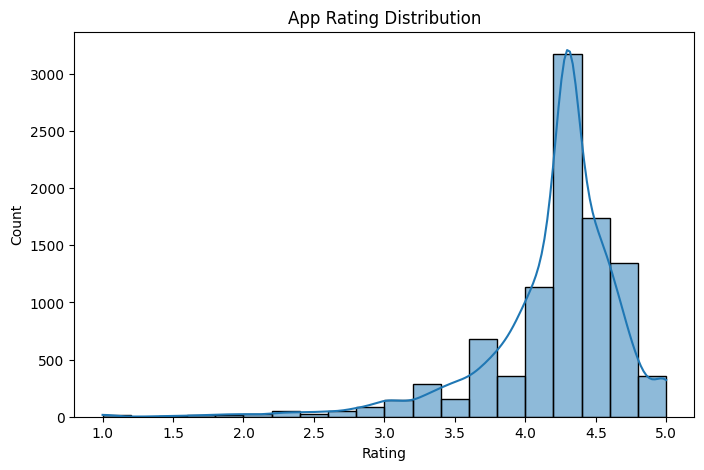

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title("App Rating Distribution")
plt.show()

Free vs Paid Apps

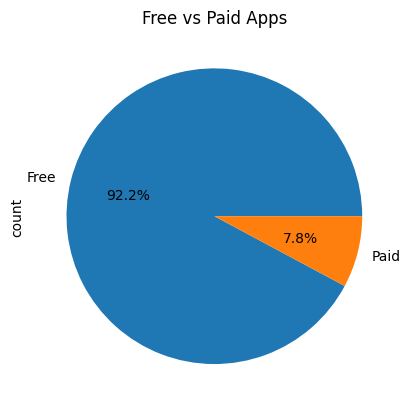

In [13]:
apps['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Free vs Paid Apps")
plt.show()

Installs vs Rating

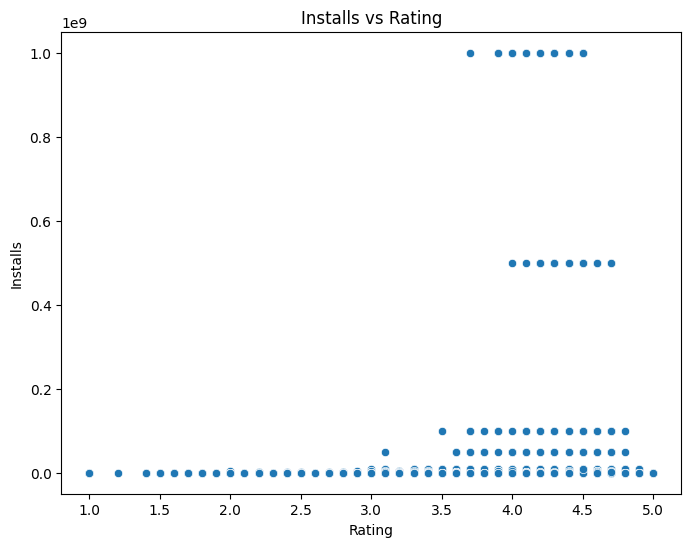

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rating', y='Installs', data=apps)
plt.title("Installs vs Rating")
plt.show()

In [15]:
def sentiment_label(rating):
    if rating >= 4:
        return "Positive"
    elif rating >= 3:
        return "Neutral"
    else:
        return "Negative"

apps['Sentiment'] = apps['Rating'].apply(sentiment_label)

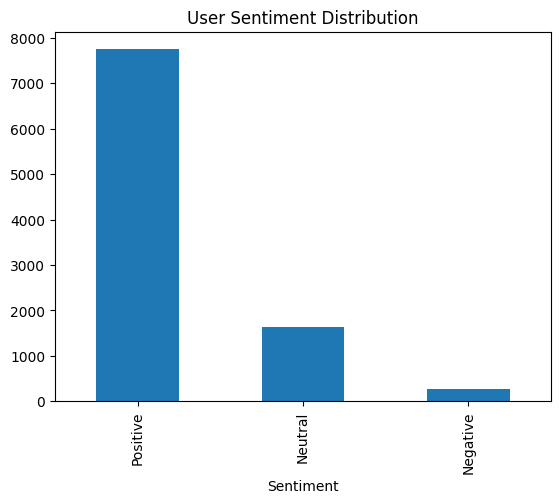

In [16]:
apps['Sentiment'].value_counts().plot(kind='bar')
plt.title("User Sentiment Distribution")
plt.show()

Average Rating by Category

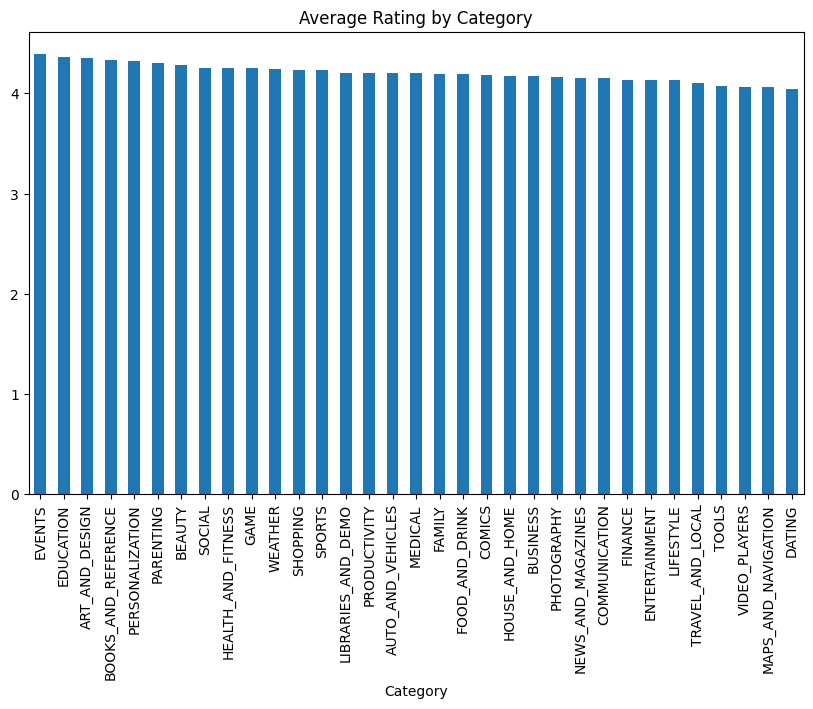

In [17]:
avg_rating = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_rating.plot(kind='bar')
plt.title("Average Rating by Category")
plt.show()


### Insights

- Most apps are free

- Higher ratings → more installs

- Game & Communication apps dominate market

- Paid apps are fewer but often higher quality

 ### Recommendations

- Focus on user experience to improve ratings

- Free apps with ads perform better

- Target high-growth categories like Education & Productivity

Save Cleaned Dataset

In [18]:
apps.to_csv("cleaned_google_play_store.csv", index=False)